 Loading and Cleaning Data.

In [13]:
import pandas as pd
import numpy as np

# Load the diabetes dataset
data = pd.read_csv("/content/drive/MyDrive/3rd sem/diabetes.csv")

# Drop all categorical columns except 'Outcome' (assuming 'Outcome' is the target variable)
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Outcome'])

# Check for missing values
missing_info = data.isnull().sum() / len(data) * 100

# Handle missing values
for column in data.columns:
    if missing_info[column] > 10:  # If more than 10% missing
        data[column].fillna(data[column].mean(), inplace=True)
    else:  # If less than 10% missing
        data.dropna(subset=[column], inplace=True)

# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())


Data after processing:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outc

Feature Matrix and Label Vector with Train- Test Split:

In [14]:
import numpy as np

# Assuming the target variable in the diabetes dataset is 'Outcome' (you can adjust this to your dataset)
X = data.drop(columns=['Outcome']).values  # Convert features to NumPy array
y = data['Outcome'].values  # Convert target to NumPy array

# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Implementation of Euclidean Distance:

In [20]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array (1D).
    point2 : np.ndarray
        The second point as a numpy array (1D).

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality or are not 1D arrays.
    """
    # Ensure the points are 1D arrays and have the same shape
    if point1.ndim != 1 or point2.ndim != 1:
        raise ValueError("Both points must be 1-dimensional arrays.")

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

# Test case for the function
try:
    # Define two points
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    # Calculate the distance
    result = euclidean_distance(point1, point2)

    # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


Problem- 1: Perform a classification task with knn from scratch.
 1. Load the Dataset:
 • Read the dataset into a pandas DataFrame.
 • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
 (e.g., check data types, missing values, summary statistics).

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/3rd sem/diabetes.csv')  # Ensure 'diabetes.csv' is in your working directory

# Display first few rows
print("Dataset Overview:")
print(df.head())

# Check for basic dataset information
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    in

 2. Handle Missing Data:
 • Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values)

# Impute missing values with column mean (if any)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Feature Engineering:
 • Separate the feature matrix (X) and target variable (y).
 • Perform a train- test split from scratch using a 70% − 30% ratio.

In [3]:
# Define the feature matrix X and target variable y
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the target column name
y = df['Outcome']

# Convert X and y to NumPy arrays
X = X.values
y = y.values

# Train-Test Split (Manual implementation)
def train_test_split(X, y, test_size=0.3, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_idx = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]

    return X_train, X_test, y_train, y_test

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTrain-Test Split:")
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")



Train-Test Split:
Training Samples: 537, Testing Samples: 231


 4. Implement KNN:
 • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
 • Compute distances using Euclidean distance.
 • Write functions for:– Predicting the class for a single query.– Predicting classes for all test samples.
 • Evaluate the performance using accuracy.

In [7]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        """
        Store training data and labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x_query):
        """
        Predict the class for a single data point (query).
        """
        # Compute distances to all training samples
        distances = [euclidean_distance(x_query, x_train) for x_train in self.X_train]

        # Sort distances and find the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common label (majority vote)
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

    def predict(self, X_test):
        """
        Predict classes for all samples in the test set.
        """
        return [self.predict_single(x) for x in X_test]

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

# Example Usage
# Assuming X_train, X_test, y_train, y_test have already been defined
k = 5  # Number of neighbors
knn = KNN(k=k)

# Fit the model on training data
knn.fit(X_train, y_train)

# Make predictions on test data
y_pred = knn.predict(X_test)

# Calculate accuracy
acc = accuracy(y_test, y_pred)
print(f"\nAccuracy of KNN Classifier (k={k}): {acc * 100:.2f}%")



Accuracy of KNN Classifier (k=5): 71.43%


Problem- 2- Experimentation:
 1. Repeat the Classification Task:
 • Scale the Feature matrix X.
 • Use the scaled data for training and testing the kNN Classifier.
 • Record the results.

In [9]:
from sklearn.preprocessing import StandardScaler

# 1. Scaling the feature matrix X
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize the KNN classifier with k=5
knn_scaled = KNN(k=5)

# 3. Fit the model with the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

# 4. Make predictions on the scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# 5. Calculate accuracy for the scaled data
acc_scaled = accuracy(y_test, y_pred_scaled)

print(f"\nAccuracy of KNN Classifier with Scaled Data (k=5): {acc_scaled * 100:.2f}%")



Accuracy of KNN Classifier with Scaled Data (k=5): 73.59%


2. Comparative Analysis: Compare the Results
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
 versus the scaled dataset.
 • Discuss:– How scaling impacted the KNN performance.– The reason for any observed changes in accuracy.

In [10]:
# Compare the accuracy of KNN on original vs. scaled data
print(f"\nAccuracy of KNN Classifier on Original Data (k=5): {acc * 100:.2f}%")
print(f"Accuracy of KNN Classifier with Scaled Data (k=5): {acc_scaled * 100:.2f}%")



Accuracy of KNN Classifier on Original Data (k=5): 71.43%
Accuracy of KNN Classifier with Scaled Data (k=5): 73.59%


Problem- 3- Experimentation with k:
 1. Vary the number of neighbors- k:
 • Run the KNN model on both the original and scaled datasets for a range of:
 k= 1,2,3,...15
 • For each k, record:– Accuracy.– Time taken to make predictions.

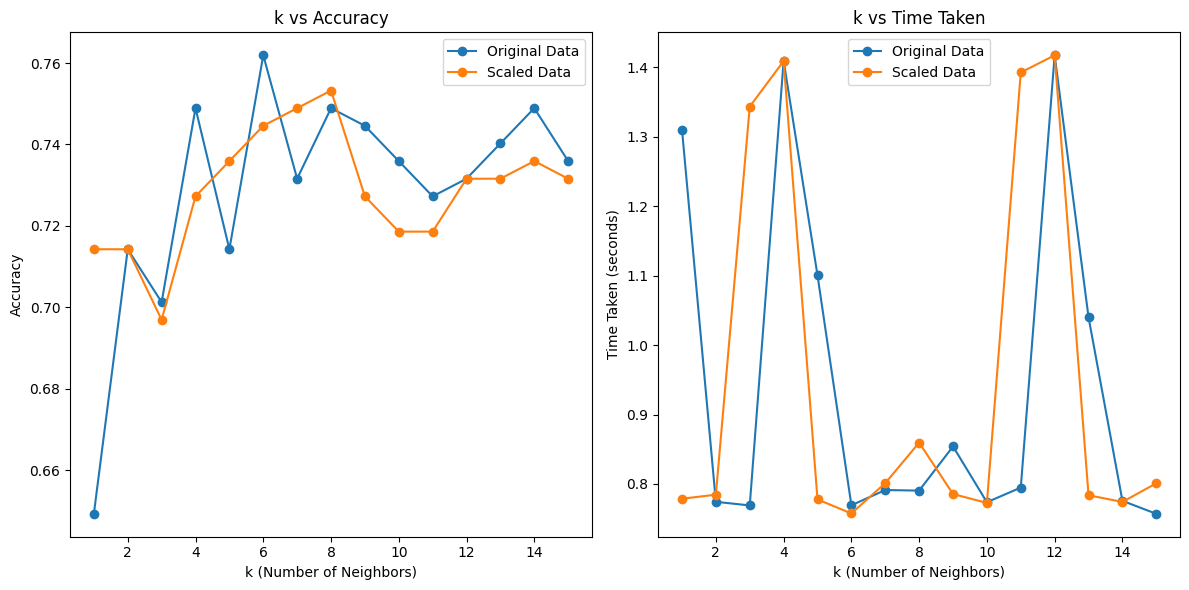

In [11]:
import time
import matplotlib.pyplot as plt

# Store the results
k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

# Run KNN for different values of k
for k in k_values:
    # Initialize KNN model for original data
    knn_original = KNN(k=k)

    # Measure time and accuracy for original data
    start_time = time.time()
    knn_original.fit(X_train, y_train)
    y_pred_original = knn_original.predict(X_test)
    accuracy_original.append(accuracy(y_test, y_pred_original))
    time_original.append(time.time() - start_time)

    # Initialize KNN model for scaled data
    knn_scaled = KNN(k=k)

    # Measure time and accuracy for scaled data
    start_time = time.time()
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    accuracy_scaled.append(accuracy(y_test, y_pred_scaled))
    time_scaled.append(time.time() - start_time)

# Plotting k vs Accuracy for original and scaled datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label="Original Data", marker='o')
plt.plot(k_values, accuracy_scaled, label="Scaled Data", marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()

# Plotting k vs Time Taken for original and scaled datasets
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label="Original Data", marker='o')
plt.plot(k_values, time_scaled, label="Scaled Data", marker='o')
plt.title('k vs Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()

plt.tight_layout()
plt.show()


 Problem- 4- Additional Questions {Optional- But Highly Recommended}:
 • Discuss the challenges of using KNN for large datasets and high-dimensional data.
 • Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
 reduction).